# Part A – Data Preparation


In [216]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [204]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


Hanya perlu encoding Education

In [206]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


Purchase Frequency agak membingungkan, kenapa bisa 0,0

In [207]:
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5

ENCODING

In [208]:
education_map = {
    'High School': 0,
    'Bachelor': 1,
    'Master': 2,
    'PhD': 3
}

df['Education_Encoded'] = df['Education'].map(education_map)
df.drop(columns=['Education'], inplace=True)


df['Purchase_Category'] = pd.cut(df['Purchase_Frequency'], 
                                 bins=3, 
                                 labels=[0, 1, 2]) # 0: Low, 1: Medium, 2: High

df.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_Encoded,Purchase_Category
0,66161.01279,57,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,1,2
1,78639.20248,60,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0,2
2,70207.25321,46,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,0
3,65866.23872,42,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0,2
4,56774.10995,36,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1,1


# Part B – Exploratory Data Analysis


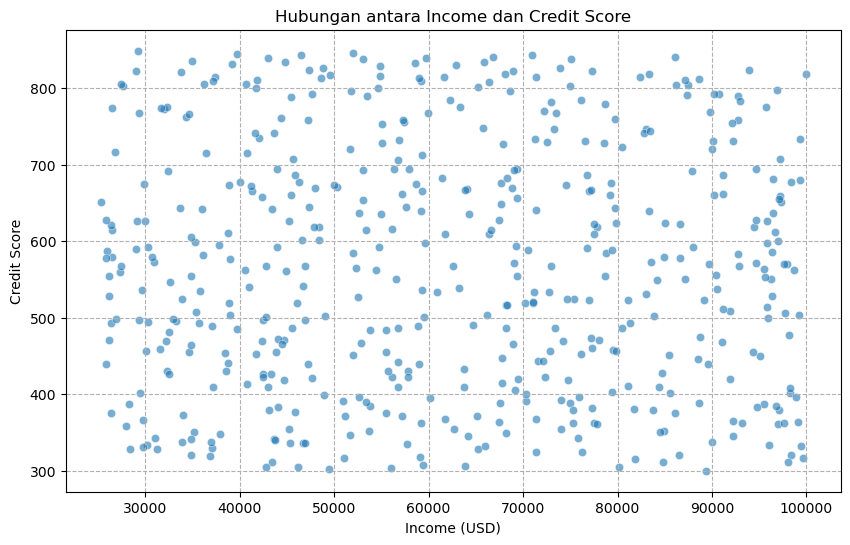

Nilai Korelasi antara Income dan Credit Score: -0.0045


In [209]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Credit_Score', alpha=0.6)
plt.title('Hubungan antara Income dan Credit Score')
plt.xlabel('Income (USD)')
plt.ylabel('Credit Score')
plt.grid(True, linestyle='--')
plt.show()
correlation = df['Income'].corr(df['Credit_Score'])
print(f"Nilai Korelasi antara Income dan Credit Score: {correlation:.4f}")

Korelasinya hanya -0.0045 jadi tidak ada correlasi yang kuat antara income dan credit score

C:\Users\Ivana Caroline\AppData\Local\Temp\ipykernel_21572\3082158215.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


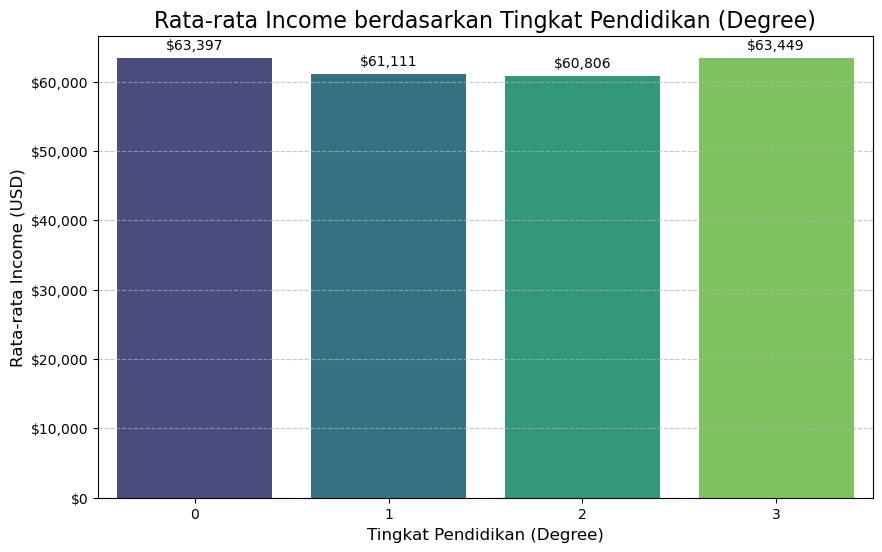

In [210]:
from matplotlib.ticker import FuncFormatter
avg_income_by_degree = df.groupby('Education_Encoded')['Income'].mean().reset_index()

# 3. Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=avg_income_by_degree,
    x='Education_Encoded',
    y='Income',
    palette='viridis' 
)

# 4. Formatting
plt.title('Rata-rata Income berdasarkan Tingkat Pendidikan (Degree)', fontsize=16)
plt.xlabel('Tingkat Pendidikan (Degree)', fontsize=12)
plt.ylabel('Rata-rata Income (USD)', fontsize=12)

# Format sumbu Y agar mudah dibaca
formatter = FuncFormatter(lambda y, p: f'${int(y):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Menambahkan label nilai di atas setiap bar
for p in barplot.patches:
    barplot.annotate(f'${int(p.get_height()):,}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)

Tingkat pendidikan tidak berpengaruh banyak terhadap Income, jadi Tingkat pendidikan tidak perlu terlalu di pikirkan

# Part C – Clustering Modeling


In [225]:
# 1. Dataset Unscaled
df_unscaled = df.copy()

# 2. Dataset Scaled
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df_unscaled)
df_scaled = pd.DataFrame(df_scaled_array, columns=df_unscaled.columns)

print("Contoh Data Unscaled:")
print(df_unscaled.head())
print("\n" + "="*50 + "\n")
print("Contoh Data Scaled:")
print(df_scaled.head())

Contoh Data Unscaled:
        Income  Age  Credit_Score  Years_with_Bank  Transaction_Count  \
0  66161.01279   57           503                1                 41   
1  78639.20248   60           779                2                 27   
2  70207.25321   46           519               14                 95   
3  65866.23872   42           834               17                 77   
4  56774.10995   36           410               12                 58   

       Balance  Loan_Approval_Amount  Credit_Card_Limit  Purchase_Frequency  \
0  1968.919899           2517.159284        5813.342700            0.975409   
1  9797.056371          31501.758840        3991.007637            0.945920   
2  7024.173403          16444.341580        6036.140567            0.272664   
3  7992.359261          45233.592940        2691.192862            0.814385   
4   538.691042          48586.582480       10144.073090            0.346523   

   Customer_Satisfaction  Online_Activity  Education_Encoded  \


In [226]:
wcss = []
K_range = range(1, 11)

for i in K_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

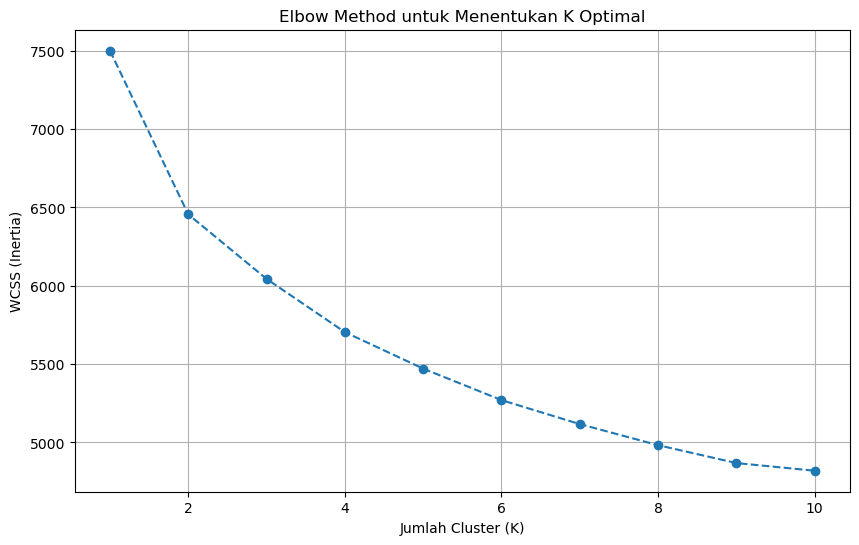

In [227]:
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [219]:
kl = KneeLocator(K_range, wcss, curve='convex', direction='decreasing')
optimal_k = kl.elbow
OPTIMAL_K = optimal_k
print(f"Titik 'siku' (optimal K) ditemukan pada: {optimal_k}")

Titik 'siku' (optimal K) ditemukan pada: 4


In [222]:
kmeans_scaled = KMeans(n_clusters=OPTIMAL_K, init='k-means++', n_init=10, random_state=42)
df['Cluster_Scaled'] = kmeans_scaled.fit_predict(df_scaled)

d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [223]:
kmeans_unscaled = KMeans(n_clusters=OPTIMAL_K, init='k-means++', n_init=10, random_state=42)
df['Cluster_Unscaled'] = kmeans_unscaled.fit_predict(df_unscaled)

d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [228]:
print("DataFrame dengan Label Cluster:")
print(df[['Income', 'Credit_Score', 'Cluster_Scaled', 'Cluster_Unscaled']].head())

DataFrame dengan Label Cluster:
        Income  Credit_Score  Cluster_Scaled  Cluster_Unscaled
0  66161.01279           503               0                 1
1  78639.20248           779               0                 2
2  70207.25321           519               2                 1
3  65866.23872           834               0                 2
4  56774.10995           410               2                 0


In [229]:
print(f"Inertia Model Scaled: {kmeans_scaled.inertia_}")
print(f"Inertia Model Unscaled: {kmeans_unscaled.inertia_}")
print("---")

Inertia Model Scaled: 5238.986300058693
Inertia Model Unscaled: 103497042027.08466
---


In [230]:
silhouette_scaled = silhouette_score(df_scaled, df['Cluster_Scaled'])
silhouette_unscaled = silhouette_score(df_unscaled, df['Cluster_Unscaled'])

print(f"Silhouette Score Model Scaled: {silhouette_scaled}")
print(f"Silhouette Score Model Unscaled: {silhouette_unscaled}")

Silhouette Score Model Scaled: 0.09850608084654482
Silhouette Score Model Unscaled: 0.3255996792065763


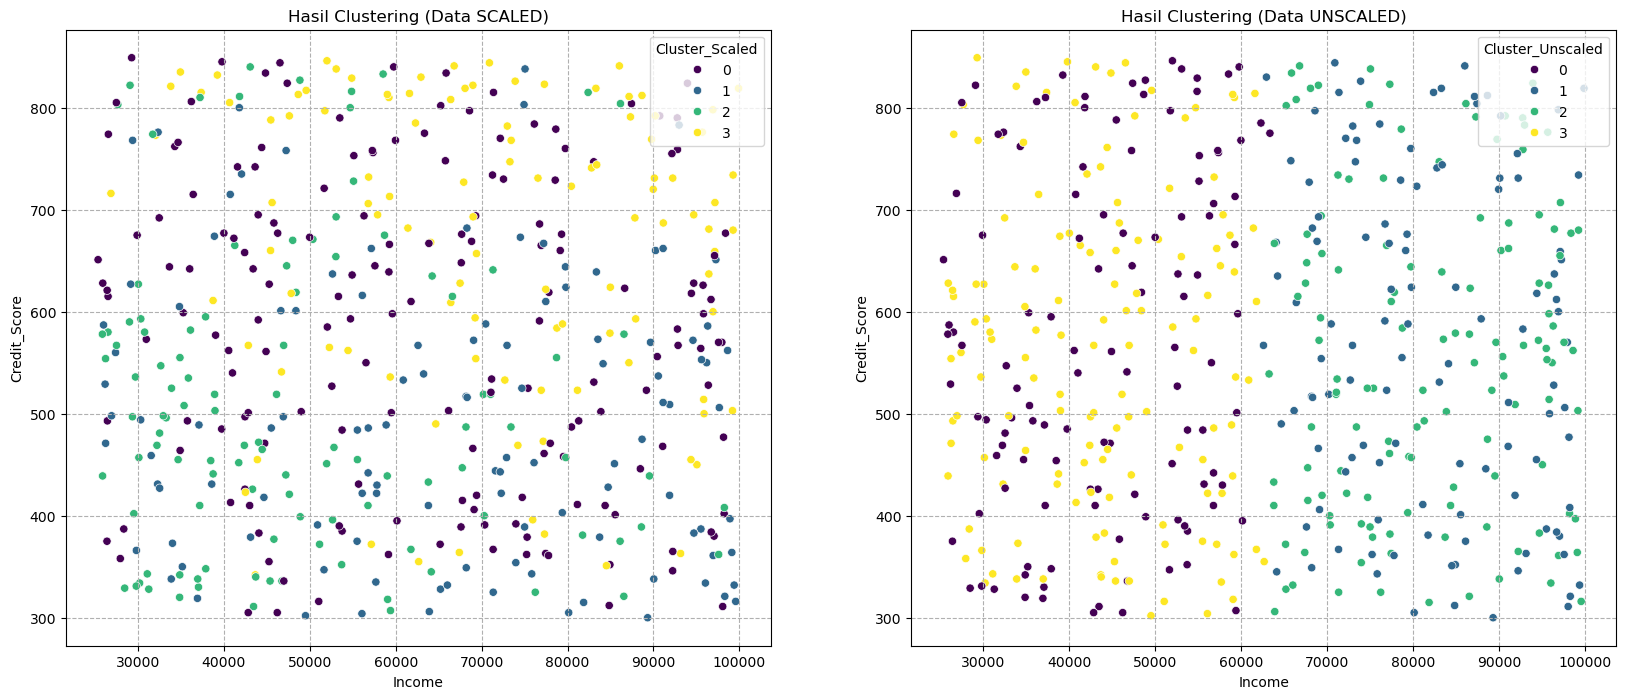

In [231]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot untuk Cluster Scaled
sns.scatterplot(ax=axes[0], data=df, x='Income', y='Credit_Score', hue='Cluster_Scaled', palette='viridis')
axes[0].set_title('Hasil Clustering (Data SCALED)')
axes[0].grid(True, linestyle='--')

# Plot untuk Cluster Unscaled
sns.scatterplot(ax=axes[1], data=df, x='Income', y='Credit_Score', hue='Cluster_Unscaled', palette='viridis')
axes[1].set_title('Hasil Clustering (Data UNSCALED)')
axes[1].grid(True, linestyle='--')

plt.show()

In [233]:
import plotly.express as px

fig_3d = px.scatter_3d(df,
                       x='Income',
                       y='Credit_Score',
                       z='Online_Activity',
                       color='Cluster_Scaled',
                       title='Visualisasi Cluster 3D (Scaled Data)',
                       labels={'Income': 'Pendapatan', 'Credit_Score': 'Skor Kredit', 'Online_Activity': 'Aktivitas Online'})

fig_3d.update_traces(marker=dict(size=5))
fig_3d.show()

In [234]:
fig_3d_unscaled = px.scatter_3d(df,
                           x='Income',
                           y='Credit_Score',
                           z='Online_Activity',
                           color='Cluster_Unscaled',  # <-- Menggunakan cluster dari data unscaled
                           title='Visualisasi Cluster 3D (Unscaled Data)', # <-- Judul diubah
                           labels={'Income': 'Pendapatan', 'Credit_Score': 'Skor Kredit', 'Online_Activity': 'Aktivitas Online'})

fig_3d_unscaled.update_traces(marker=dict(size=5))
fig_3d_unscaled.show()

# D – Segmentation & Managerial Implication

1. Unscaled lebih baik dari pada scaled
2. Karena Scaling memperkecilakan jarak antara value

Cluster 0/1 (Ungu dan merah): "Dewasa Muda / Pendapatan Menengah"
Profil Berdasarkan Plot: Cluster ini berada di kuadran kiri-bawah, yang menunjukkan Usia Rendah (Scaled Age rendah) dan Pendapatan Rendah-Menengah (Scaled Income rendah).

Profil Berdasarkan Data:


Usia: Rata-rata 28.3 tahun (rentang 26-32 tahun). Ini adalah segmen termuda.


Pendapatan: Rata-rata $58.611 (rentang $45k - $90k).

Insight (Wawasan): Ini adalah segmen pelanggan Anda yang paling muda. Mereka kemungkinan besar adalah profesional muda atau baru memulai karir. Meskipun pendapatan mereka saat ini moderat, mereka memiliki potensi besar untuk tumbuh. Mereka kemungkinan besar sensitif terhadap harga namun responsif terhadap pemasaran digital.


Cluster 2/3 (Biru dan Kuning): "Dewasa Senior / Pendapatan Menengah"
Profil Berdasarkan Plot: Cluster ini berada di kuadran kiri-atas, yang berarti Usia Tinggi (Scaled Age tinggi) dan Pendapatan Menengah (Scaled Income rendah-menengah).

Profil Berdasarkan Data:


Usia: Rata-rata 40.5 tahun (rentang 39-43 tahun). Ini adalah segmen tertua.


Pendapatan: Rata-rata $68.666 (rentang $58k - $82k).

Insight (Wawasan): Ini adalah segmen pelanggan Anda yang paling senior (dewasa). Menariknya, pendapatan rata-rata mereka tidak setinggi Cluster 1, meskipun usianya lebih tua. Mereka mungkin adalah pelanggan setia yang sudah lama, berada di karir yang stabil, tetapi mungkin memiliki komitmen finansial lain (misalnya keluarga atau cicilan rumah). Mereka cenderung mencari produk yang value-for-money (seimbang antara harga dan kualitas).